#   **Pattern recognition course | ECE AUTH | 2nd project | Winter semester 2022**

# **Gaming stress**

![ logo](keyboard-and-mouse.png)



>   Giachoudis Christos


>   Kostopoulos Andreas Marios

# **General comments**



# Necessary imports

In [1]:
# Importing the necessary libraries and modules
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import cm
from IPython import display

# **Useful functions for plotting**

In [22]:
# ***Function for plotting into subplots at the same figure***
#_____________________________________________________________
# fig: the figure in which will be done the plotting
# figx: number of subplot placeholders on the x axis
# figy: number of subplot placeholders on the y axis
# fig_no: the place where the plot will be putted
# title: the title of the plot
# x_label: the label for the x axis of the plot
# y_label: the label for the y axis of the plot
# x: values for the x axis
# y: values for the y axis
#_____________________________________________________________
# There are some changes to the background color and the type of the grid too. But those changes are not to be changed by given arguments
def vizualize(fig, figx, figy, fig_no, title, x_label, y_label, x, y, custom_color="blue"):
    ax = fig.add_subplot(figy, figx, fig_no)
    ax.set_facecolor('black')
    ax.grid(color='white', linestyle="--", alpha=0.3)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot(x, y, color=custom_color)
    plt.legend([f"{title}"], loc = "upper right") 

# ***Same as the previous function but for more that one plots at the same subplot***
#________________________________________________________________
# y: a list of numpy arrays
#________________________________________________________________
def vizualize_more(fig, figx, figy, fig_no, title, x_label, y_label, x, y, title_comb):
    ax = fig.add_subplot(figy, figx, fig_no)
    ax.set_facecolor('black')
    ax.grid(color='white', linestyle="--", alpha=0.3)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    for i in range(len(y)):
        plt.plot(x, y[i])
    plt.legend(title_comb, loc = "upper right")

# **Data that are given by the task**
* ## Classes
    * ### $ω_1$: no stress
    * ### $ω_2$: stress

* ## Apriori probabilities
    * ### $P(ω_1) = \frac{7}{12}$
    * ### $P(ω_2) = \frac{5}{12}$ 

* ## Probability density function for x
    * ### $p(x|θ) = \frac{1}{\pi} \cdot \frac{1}{1+(x-θ)^2}$

In [12]:
#Function to calculate L(θ) for task A1
"""
Arguments:
D:          List of elements like those in D1 and D2
thetas:     List of theta values

Returns:    log(pdf)  
"""
def prob(D, thetas):
    #Initialising p1 and p2 where p_i = p(x_i|theta)
    p = 1
    for x in D:
        p *= (1/math.pi)*(1/(1+(x-thetas)**2))
    return p

#Discrimination function for task A1
"""
Arguments:
X:          List of total elements to be sorted
theta_i:    the two theta values found from maximum likelihood estimation
p_i:        A-priori probabilities

Returns:
g:          The discrimination function
"""
def discrimination(X, theta1, theta2, p1, p2):
    g = list()
    for x in X:
        temp = (np.log((1/math.pi)*(1/(1+(x-theta1)**2))) - np.log((1/math.pi)*(1/(1+(x-theta2)**2)))) + (np.log(P_apriori1) - np.log(P_apriori2))
        g.append(temp)
    return g

# **Part A**

# **Task A.1**
* ## Data: 
    * ### $D1 = [2.8,\, -0.4,\, -0.8,\, 2.3,\, -0.3,\, 3.6,\, 4.1]$
    * ### $D2 = [-4.5,\, -3.4,\, -3.1,\, -3.0,\, -2.3]$

#### $Note:\,\,D_1\,\, is\,\, referring\,\, to\,\, ω_1\,\, class\,\, and\,\, D_2\,\, is\,\, referring\,\, to\,\, ω_2$

* ## Needed math types
    * ### $p(D_i|θ) = \prod_{k=1}^N p(x_k|θ)$
    * ### $\hat{θ}_{ML} = arg \max_{θ} \prod_{k=1}^N p(x_k|θ)$

## $Our\, goal\, for\, the\, first\, task\, is\, to\, estimate\, the\, unknown\, parameters\, θ_1\, and\, θ_2\,$
## $ using\, a\, set\, of\, available\, feature\, vectors\, from\, each\, class.$

In [13]:
#A-priori probabilities
P_apriori1 = 7/12
P_apriori2 = 5/12

#Data for ω1
D1 = [2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1]

#Data for ω2
D2 = [-4.5, -3.4, -3.1, -3.0, -2.3]

# θ generation
begin = -60
end = 60
step = 0.01
theta = np.arange(begin, end, step)

Estimation of theta1: 2.5999999999875456
Estimation of theta2: -3.1600000000113084


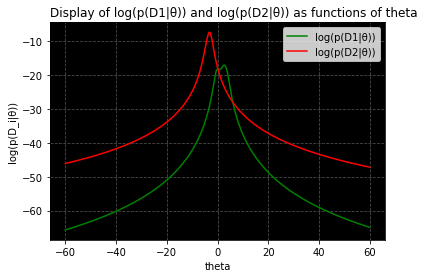

In [14]:
#Task A1

#Initialising p1 and p2 where p_i = p(x_i|theta) as can be seen from the pictures above
# p1 = 1
# p2 = 1

# #Calculating L(θ) # !!!!!!!!!!!!make function
# for x in D1:
#     p1 *= (1/math.pi)*(1/(1+(x-theta)**2))

# for x in D2:
#     p2 *= (1/math.pi)*(1/(1+(x-theta)**2))

# #L_i = log(p(x_i|theta))
# L1 = np.log(p1)
# L2 = np.log(p2)

p1 = prob(D1, theta)
p2 = prob(D2, theta)

L1 = np.log(p1)
L2 = np.log(p2)

#Finding the max value (theta_i) of L_i array instead of calculating via the derivative method: d(L) / d(theta) = 0
theta1 = theta[L1.argmax()]
theta2 = theta[L2.argmax()]

#Estimation of theta_i
print(f"Estimation of theta1: {theta1}")
print(f"Estimation of theta2: {theta2}")

#Plotting log(p(D_i|theta))
# plot_function(theta, L1, "green", "Display", "theta", "log(p(D1|theta)")
# plot_function(theta, L2, "red", "Display", "theta", "log(p(D2|theta)")
ax = plt.axes()
ax.set_facecolor("black")
plt.plot(theta,L1, color="green")
plt.plot(theta,L2, color="red")
plt.title("Display of log(p(D1|θ)) and log(p(D2|θ)) as functions of theta", loc="left")
plt.xlabel("theta")
plt.ylabel("log(p(D_i|θ))")
plt.legend(["log(p(D1|θ))", "log(p(D2|θ))"])
plt.grid(color="white", linestyle="--", alpha=0.3)
plt.show()

# **Task A.2**
## Discrimination function
### $g(x) = \log{p(x|\hat{θ}_1)} - \log{p(x|\hat{θ}_2)} + \log{P(ω_1)} - \log{P(ω_2)}$

g is [3.8951553898439766, 0.18769376727702713, -0.31159197656149473, 3.6781857828423945, 0.31168291373696766, 3.4870178275433763, 3.1413717587738073, -2.575313716832764, -3.2184434859088196, -3.171181114669178, -3.11517304837697, -2.3291483065109073] and is size of 12
g1 is [3.8951553898439766, 0.18769376727702713, -0.31159197656149473, 3.6781857828423945, 0.31168291373696766, 3.4870178275433763, 3.1413717587738073] and is size of 7
g2 is [-2.575313716832764, -3.2184434859088196, -3.171181114669178, -3.11517304837697, -2.3291483065109073] and is size of 5


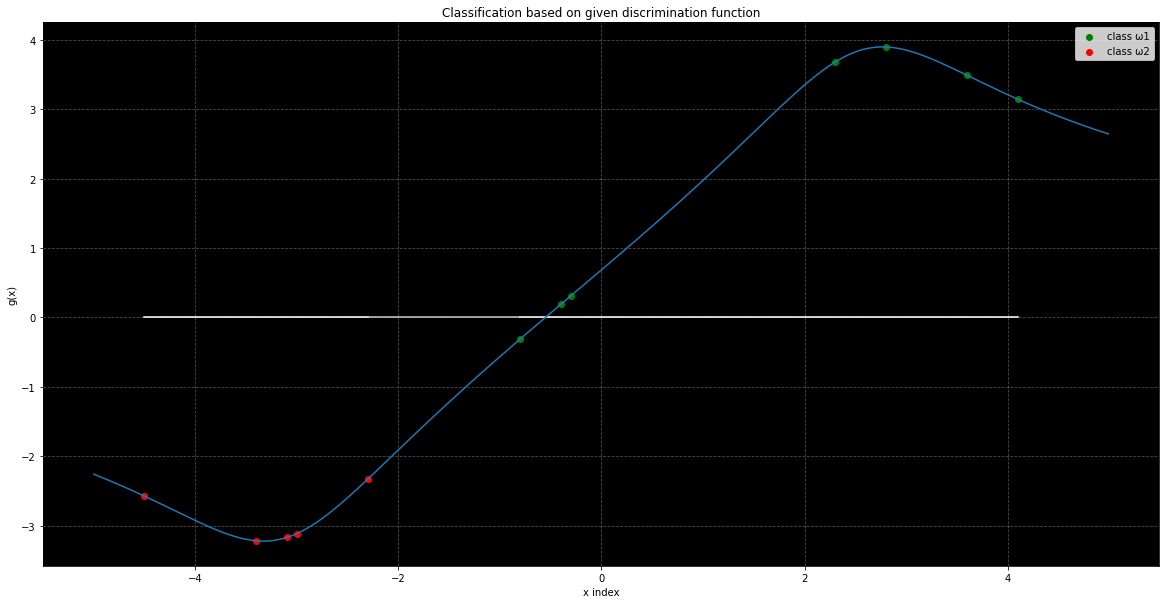

In [41]:
#Index X = D1 U D2
X = D1 + D2

#Discrimination Function g
g = list()

#g = g1 - g2
g1 = list()
g2 = list()

# g computations
g = discrimination(X, theta1, theta2, P_apriori1, P_apriori2)
g1 = g[:len(D1)]
g2 = g[len(D1):]
# # computing the h function to plot it
begin = -5
end = 5
x_axis = np.arange(begin, end, step)
g_all = discrimination(x_axis, theta1, theta2, P_apriori1, P_apriori2)
#g1 and g2 generated from g


print(f"g is {g} and is size of {np.size(g)}")
print(f"g1 is {g1} and is size of {np.size(g1)}")
print(f"g2 is {g2} and is size of {np.size(g2)}")
# define classification boundary
discrimination_line = [0 for _ in range(len(X))]

#Need to implement subplots if wanted the second one
#Classification and visualisation
fig = plt.figure(figsize=(20, 10))
ax = plt.axes()
ax.set_facecolor("black")
plt.scatter(D1, g1, color="green")
plt.scatter(D2, g2, color="red")
plt.plot(X, discrimination_line, color="white", alpha=0.8)
plt.plot(x_axis, g_all)
plt.title("Classification based on given discrimination function")
plt.xlabel("x index")
plt.ylabel("g(x)")
plt.grid(color="white", linestyle="--", alpha=0.3)
plt.legend(["class ω1", "class ω2"])
plt.show()

# **Results and comments**
### The sign of $g(x)$ determines the way we will classify each sample from our data. Specifically, if $g(x)>0$ the sample is classified in the first class $ω_1$ and in class $ω_2$ if $g(x)<0$. Based on this rule we see that our data is not perfectly sorted as a sample that normally belongs to class $ω_1$ appears to be misclassified in class $ω_2$.

# **Part B**
# **Bayes estimation method**
## Probability density function for θ
### $p(θ) = \frac{1}{10\pi} \cdot \frac{1}{1+(\frac{θ}{10})^2}$

___The θ values:___
[-60.   -59.99 -59.98 ...  59.97  59.98  59.99]

___The pdf values:___
[0.0008603  0.00086058 0.00086086 ... 0.00086113 0.00086086 0.00086058]

___The plot of the pdf of θ:___


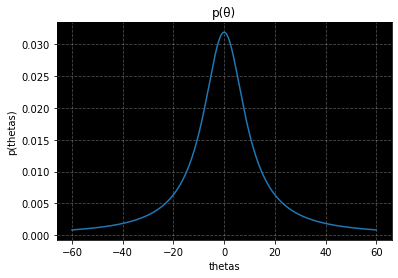

In [17]:
# Prior probability density function for θ based on the task's given data
p_theta = (1/(10*math.pi)) * (1/(1 + (theta/10)**2))

# Print θ and pdf values to be sure
print("___The θ values:___")
print(theta)
print("")
print("___The pdf values:___")
print(p_theta)
print("")

# Plot the pdf
print("___The plot of the pdf of θ:___")
ax = plt.axes()
ax.set_facecolor("black")
plt.title("p(θ)") 
plt.xlabel("thetas") 
plt.ylabel("p(thetas)") 
plt.plot(theta, p_theta)
plt.grid(color="white", linestyle="--", alpha=0.3)
plt.show()

# **Task B.1**

## Computation of  $p(θ|D_1)$ and $p(θ|D_2)$

### $p(θ|D_i) = \frac{p(D_i|θ)p(θ)}{\int p(D_i|θ)p(θ)dθ}$

# **Useful custom functions**

> $p(θ|D_i)$ function implementation

In [18]:
# p(θ|Di) function for better code usability
#____________________________________________
# p: the pdf values of Di based on theta | p(Di|θ)
# p_theta: the pdf values of θ random variable | p(θ)
# step: the step we used to create the theta values
#____________________________________________
# Make sure that p and p_theta have been calculated using the same theta-set
def p_theta_Di(p, p_theta, step):
    # Multiplication computation for both the denominator and the numerator
    numerator = np.multiply(p, p_theta)
    # Integral computation (Approximation using sum and the rule of the trapezoid)
    integral = 0
    for i in range(1, numerator.size):
        integral += ((numerator[i] + numerator[i-1]) * step) / 2
    # p(θ|D_i) computation
    p_theta_D = numerator/integral
    return p_theta_D

# **Implementation and vizualization**

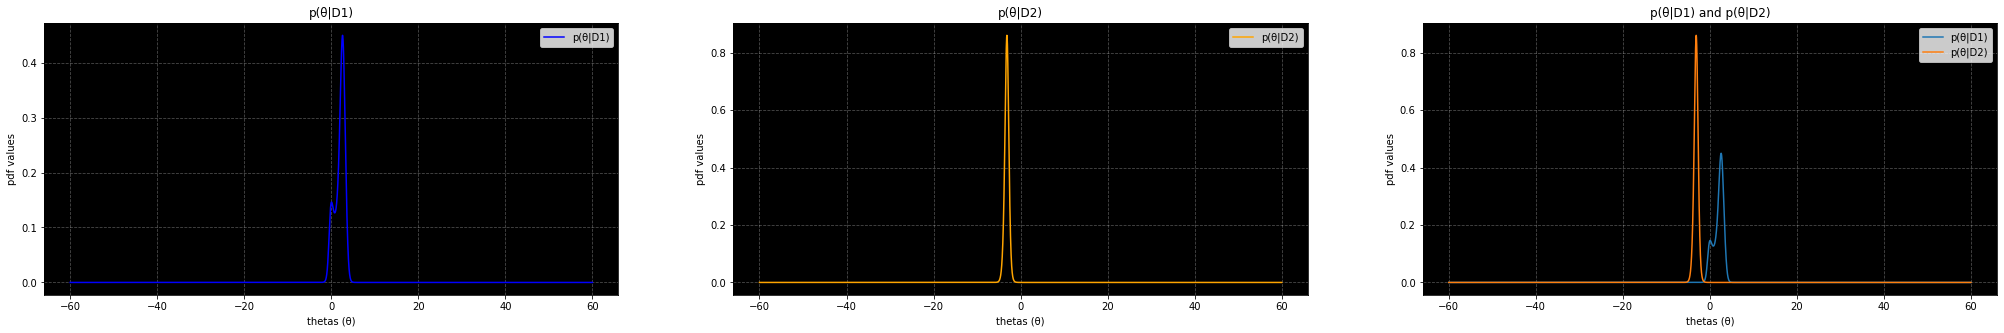

In [24]:
# p(D_i|θ) exists because of task A.1
# p(θ) has been computed at the beginning of task B
# To compute the p(θ|Di) we use the custom made function above
p_theta_D1 = p_theta_Di(p1, p_theta, step)
p_theta_D2 = p_theta_Di(p2, p_theta, step)


# Plot the computed pdfs
# Prepare the figure
fig = plt.figure(figsize=(35, 5))
title1 = "p(θ|D1)"
title2 = "p(θ|D2)"
title3 = "p(θ)"
title4 = "p(θ|D1) and p(θ|D2)"
x_label = "thetas (θ)"
y_label = "pdf values"

# Plot separately
# We will have 3 subplots so we use the custom made functions
vizualize(fig, 3, 1, 1, title1, x_label, y_label, theta, p_theta_D1, custom_color="blue")
vizualize(fig, 3, 1, 2, title2, x_label, y_label, theta, p_theta_D2, custom_color="orange")
combine_list = [p_theta_D1, p_theta_D2]
combine_titles = [title1, title2]
vizualize_more(fig, 3, 1, 3, title4, x_label, y_label, theta, combine_list, combine_titles)

# Show all plots
plt.show()

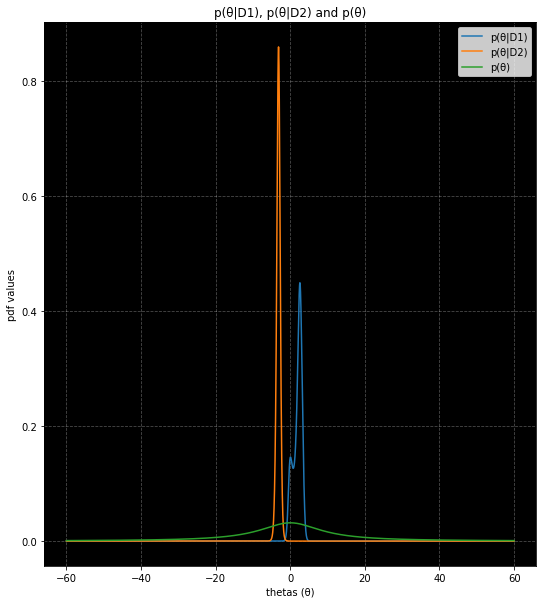

In [42]:
# plotting p(θ|D1), p(θ|D2) and p(θ) together
fig = plt.figure(figsize=(30, 10))
combine_list = [p_theta_D1, p_theta_D2, p_theta]
combine_titles = [title1, title2, title3]
title5 = "p(θ|D1), p(θ|D2) and p(θ)"
vizualize_more(fig, 3, 1, 3, title5, x_label, y_label, theta, combine_list, combine_titles)

# **Results and comments**
* ### We observe that the values of the conditional probability density functions of $p(θ|D_1)$ and $p(θ|D_2)$ are concentrated in a much narrower region than the one in which the values of the p(θ) are found. After the calculation we notice that the variance of values has decreased significantly. This helps in better classification, because as we can see, we don't have significant overlap between $p(θ|D_1)$ and $p(θ|D_2)$.


# **Task B.2**

> `Predict` function implementation

## Needed functions for the predict function

### $h(x) = \log{p(x|D_1)} - \log{p(x|D_2)} + \log{P(ω_1)} - \log{P(ω_2)}$

### $p(x|D_i) = \int p(x|θ)p(θ|D_i)dθ$

![ p(x|Di)](predict2.jpg)

# **Useful custom functions**

> $p(x|θ)$ function implementation  
> $p(x|D_i)$ function implementation  
> `predict` function implementation

In [20]:
# Make sure that everything has been calculated using the same theta-set

# p(x|θ) function
#____________________________________________
# x: the x value
# theta: the theta value
#____________________________________________
def p_x_theta(x, theta):
    return ((1/math.pi) * (1/(1 + (x - theta) ** 2)))

# p(x|D) function
#____________________________________________
# x: specific x value
# theta: all the theta values
# p: the pdf values of Di based on theta | p(Di|θ)
# p_theta: the pdf values of θ random variable | p(θ)
# step: the step we used to create the theta values
#____________________________________________
def p_x_Di(x, theta, p, p_theta, step):
    integral = 0
    mult = p_x_theta(x, theta) * p_theta_Di(p, p_theta, step)
    for i in range(1, len(theta)):
        integral += ((mult[i] + mult[i-1]) * step) / 2
    return integral

# predict function declaration and implementation
#________________________________________________
# x: specific x value
# theta: all the theta values
# p1: the pdf values of Di based on theta | p(D1|θ)
# p2: the pdf values of Di based on theta | p(D2|θ)
# p_theta: the pdf values of θ random variable | p(θ)
# step: the step we used to create the theta values
#________________________________________________
def predict(x, theta, p1, p2, p_theta, step):
    ret = []
    for i in x:
        temp = np.log(p_x_Di(i, theta, p1, p_theta, step)) - np.log(p_x_Di(i, theta, p2, p_theta, step)) + np.log(P_apriori1) - np.log(P_apriori2)
        ret.append(temp)
    return ret

# **Applying**

In [35]:
h1 = predict(D1, theta, p1, p2, p_theta, step) # predict function for the first set of samples
h2 = predict(D2, theta, p1, p2, p_theta, step) # predict function for the second set of samples
# defining the classification boundary
boundary = np.log(P_apriori1) - np.log(P_apriori2)
discrimination_line = [boundary for _ in range(len(X))]
# computing the h function to plot it
begin = -5
end = 5
x_axis = np.arange(begin, end, step)
h = predict(x_axis, theta, p1, p2, p_theta, step)

# **Plotting**

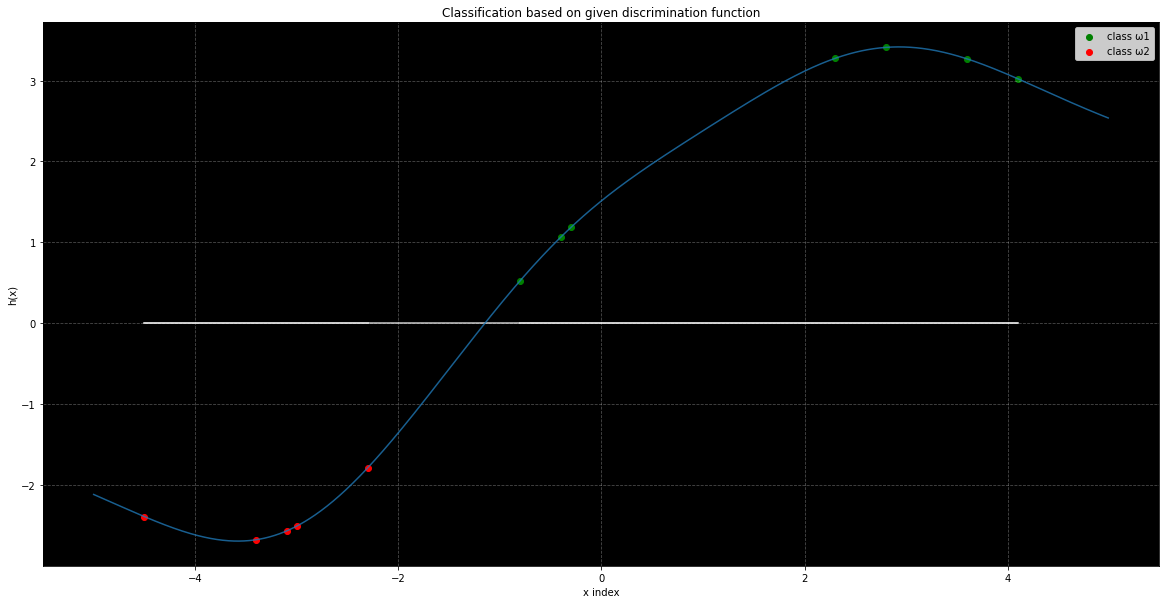

In [40]:
# Plot the computed pdfs
fig = plt.figure(figsize=(20, 10))
ax = plt.axes()
ax.set_facecolor("black")
plt.scatter(D1, h1, color="green")
plt.scatter(D2, h2, color="red")
plt.plot(X, discrimination_line, color="white", alpha=0.8)
plt.plot(x_axis, h, alpha=0.8)
plt.title("Classification based on given discrimination function")
plt.xlabel("x index")
plt.ylabel("h(x)")
plt.grid(color="white", linestyle="--", alpha=0.3)
plt.legend(["class ω1", "class ω2"])
plt.show()

# **Results and comments**

* ## We observe that for values of $h(x)$ greater than the decision threshold (the difference of the logarithm of apriori probabilities) the bayes estimation method classifies a sample in the first class $ω_1$, while in the opposite case the sample is classified in class $ω_2$. It is obvious that the Bayes estimation method is more efficient than the maximum likelihood estimation. This makes sense if we take into consideration the results of the previous query, namely the smallest variances and the very small overlapping.